In [10]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_excel('bnb_processed_data.xlsx')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...,...
1914,2024-05-27,599.825928,613.388184,599.700745,603.526428,603.526428,1691663828
1915,2024-05-28,603.526428,604.985107,593.716187,601.213257,601.213257,1852329404
1916,2024-05-29,601.213257,602.931519,592.966614,594.972046,594.972046,1642696946
1917,2024-05-30,594.972534,601.665039,586.557678,595.026794,595.026794,1737524745


In [11]:
# 3. Chia train test validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))
test_size = len(df) - train_size
train_data = df[:train_size]
test_data = df[train_size:]

In [12]:
# 4. Preprocess data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

In [13]:
# 5. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


In [14]:
# 6. Training process
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [15]:
# 7. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [16]:
# 8. Evaluate model accuracy with RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Testing RMSE: {test_rmse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing MAPE: {test_mape}%")

Testing RMSE: 131.9737634198662
Testing MAE: 124.79959640272027
Testing MAPE: 32.98711692123076%


In [17]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# Create a new dataframe with the predicted closing prices
df_next_30_days = pd.DataFrame(y_next_30_days, index=last_30_data, columns=['Close'])

# Print the dataframe
print(df_next_30_days)

#Quá trình tạo index predict 60 ngày tiếp theo
last_index = last_30_data[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Create a new dataframe with the predicted closing prices
df_next_60_days = pd.DataFrame(y_next_60_days, index=last_60_data, columns=['Close'])

# Print the dataframe
print(df_next_60_days)

#Quá trình tạo index predict 90 ngày tiếp theo
last_index = last_60_data[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# Create a new dataframe with the predicted closing prices
df_next_90_days = pd.DataFrame(y_next_90_days, index=last_90_data, columns=['Close'])

# Print the dataframe
print(df_next_90_days)




Predicted closing prices for the next 30 days:
[443.68112479 443.90478331 444.12844184 444.35210036 444.57575888
 444.79941741 445.02307593 445.24673445 445.47039298 445.6940515
 445.91771003 446.14136855 446.36502707 446.5886856  446.81234412
 447.03600264 447.25966117 447.48331969 447.70697821 447.93063674
 448.15429526 448.37795378 448.60161231 448.82527083 449.04892936
 449.27258788 449.4962464  449.71990493 449.94356345 450.16722197]
           Close
1918  443.681125
1919  443.904783
1920  444.128442
1921  444.352100
1922  444.575759
1923  444.799417
1924  445.023076
1925  445.246734
1926  445.470393
1927  445.694052
1928  445.917710
1929  446.141369
1930  446.365027
1931  446.588686
1932  446.812344
1933  447.036003
1934  447.259661
1935  447.483320
1936  447.706978
1937  447.930637
1938  448.154295
1939  448.377954
1940  448.601612
1941  448.825271
1942  449.048929
1943  449.272588
1944  449.496246
1945  449.719905
1946  449.943563
1947  450.167222
Predicted closing prices for t

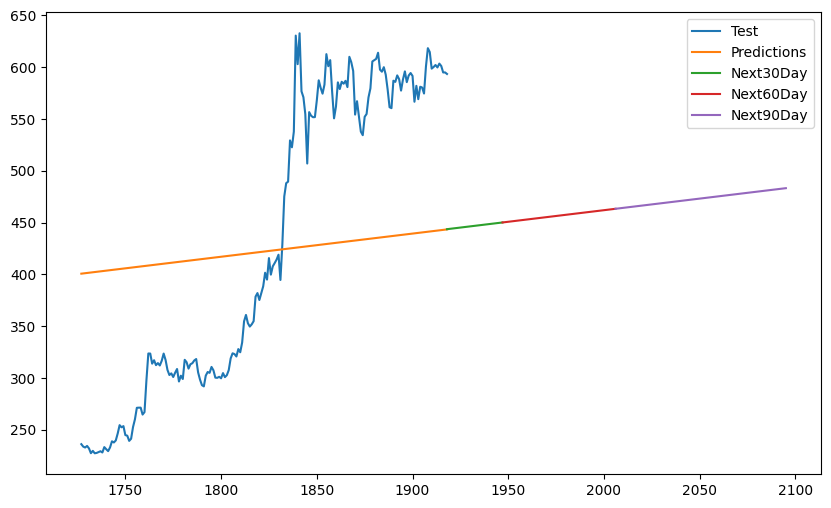

In [18]:
#Vẽ hình
plt.figure(figsize=(10, 6))
# plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()